In [10]:
import matplotlib.pyplot as plt
import numpy as np

# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

# Exercise 1-1
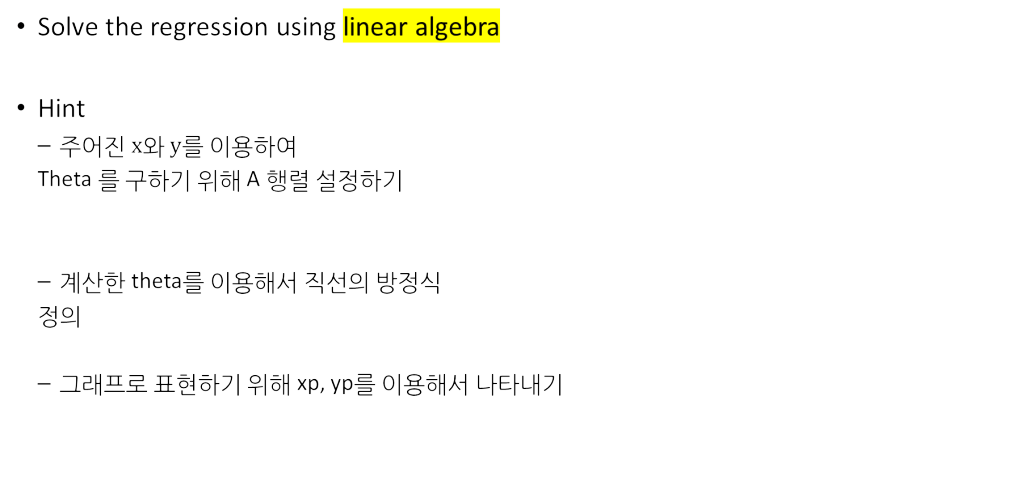

In [5]:
m = y.shape[0]
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)

theta:
 [[0.65306531]
 [0.67129519]]


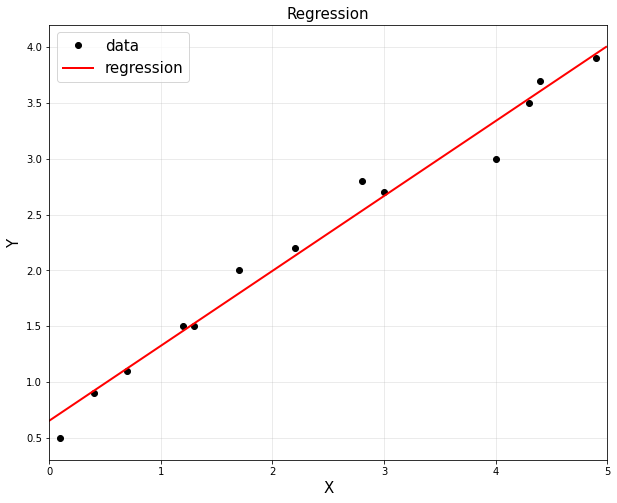

In [6]:
plt.figure(figsize=(10,8))
plt.title('Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko',label="data")

xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp = theta[0,0]+theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth=2, label='regression')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()

# Exercise 1-2
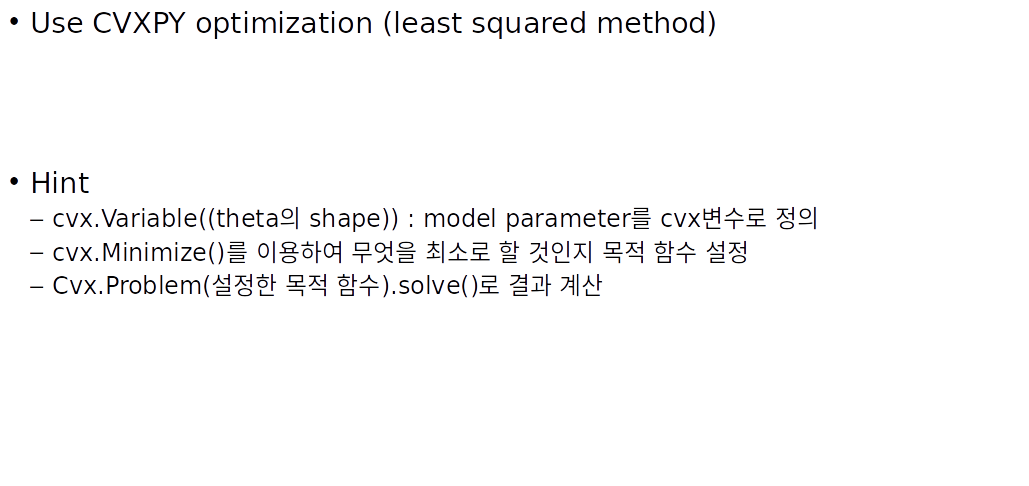

In [11]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

In [12]:
theta = cvx.Variable([2,1])
obj = cvx.Minimize(cvx.norm(A*theta-y, 2))
prob = cvx.Problem(obj).solve()

print('theta:\n', theta.value)

theta:
 [[0.65306531]
 [0.67129519]]


/home/piai/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)


# Exercise 2
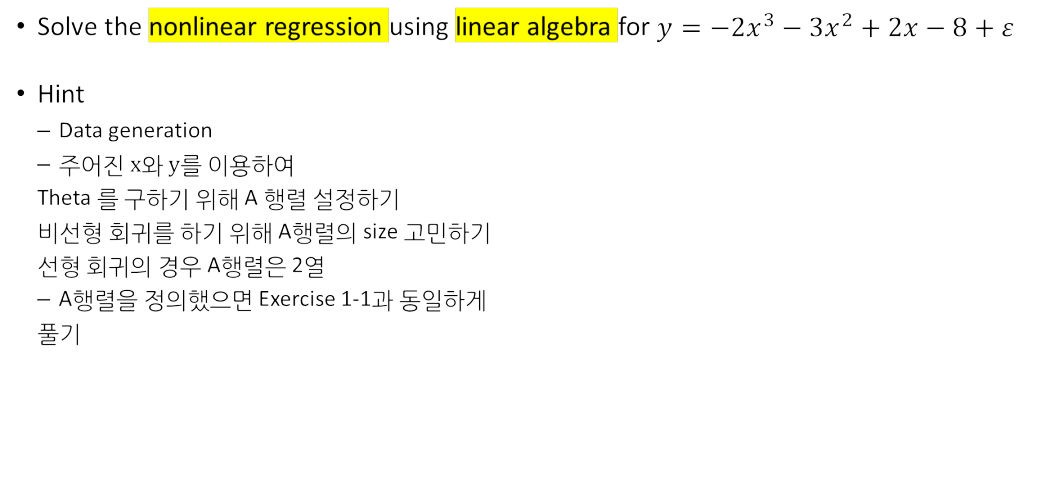

In [13]:
n = 100            
x = -8 + 15*np.random.rand(n, 1)
noise = 100*np.random.randn(n, 1)
y = -8 + 2*x - 3*x**2 - 2*x**3 + noise

In [14]:
A = np.hstack([x**0, x, x**2, x**3])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print('theta:\n', theta)

theta:
 [[-14.67647099]
 [ -7.42569837]
 [ -1.96411213]
 [ -1.7339907 ]]


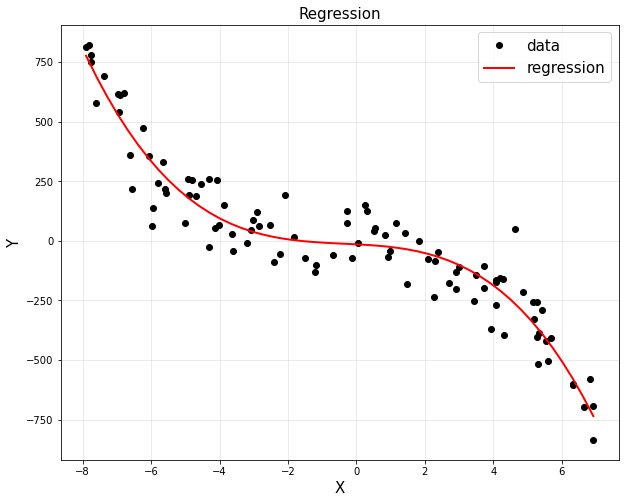

In [15]:
plt.figure(figsize=(10, 8))
plt.title("Regression", fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a straight line (fitted line)
xp = np.linspace(np.min(x), np.max(x))
# yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2 + theta[3,0]*xp**3

yp = np.zeros_like(xp)

for i in range(4):
    yp += theta[i, 0] * (xp ** i)

plt.plot(xp, yp, 'r', linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

# Exercise 3
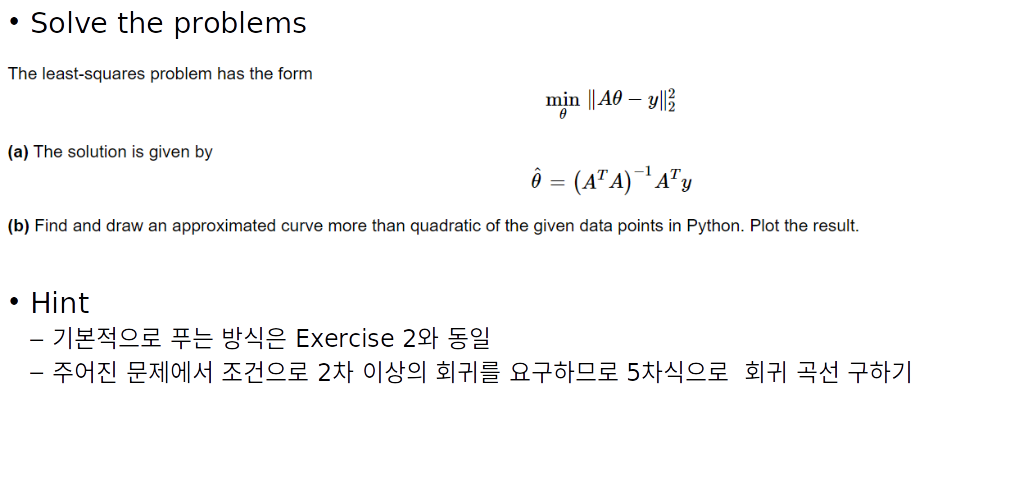

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

x = np.linspace(-4.5, 4.5, 15).reshape(-1,1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512,
              0.0023, -2.5234, 0.2253, -1.5343, -4.5966]).reshape(-1,1)

A = np.hstack([x**i for i in range(6)])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print(theta)

[[-2.64973896]
 [-1.55842574]
 [ 0.5569573 ]
 [ 0.20888287]
 [-0.02560872]
 [-0.00808216]]


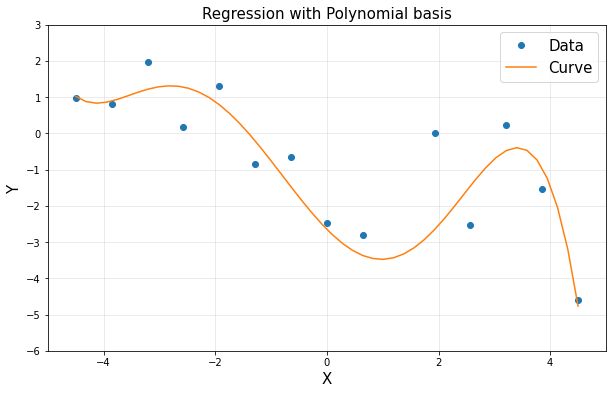

In [29]:
# to plot a straight line (fitted line)
xp = np.linspace(np.min(x), np.max(x))
# yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2 + theta[3,0]*xp**3

yp = np.zeros_like(xp)

for i in range(6):
    yp += theta[i, 0] * (xp ** i)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.axis([-5, 5, -6, 3])
plt.title('Regression with Polynomial basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()